In [87]:
import numpy as np
import pandas as pd
import openturns as ot
import openturns.viewer as viewer
import math
from matplotlib import pylab as plt
import scipy

In [88]:
import modelib

In [89]:
#fp = 'small_ints.txt'
# for histogram in openturns, don't give counts
# give raw sizes
fp = 'arch/data/intron.txt'
# 0 is intcount_bins, 1 is intfreq_bins, 2 is intsizes, 3 is intfreqs
data = modelib.get_intbins(fp, 500, 5)[2]
print(min(data))

38


In [90]:
# trying to use openturns
# https://openturns.discourse.group/t/help-with-reading-in-experimental-data-text-or-csv-file/135
# https://stackoverflow.com/questions/52455797/python-fitting-a-gev-distribution-from-these-values

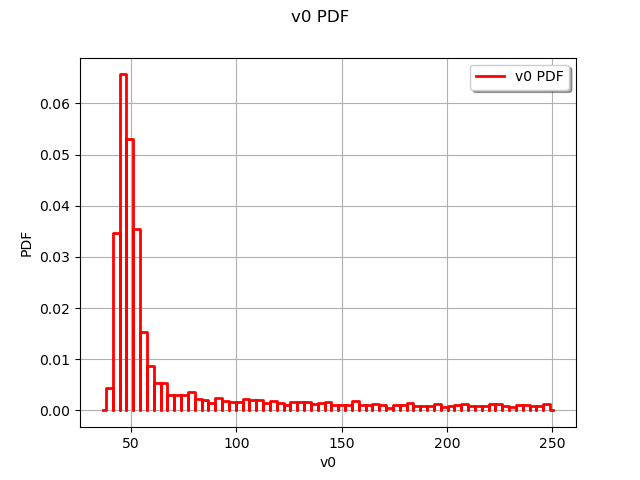

In [91]:
sample = ot.Sample([[x] for x in data if x < 250])
# needs raw data as input, makes the histogram for you
# i was giving a histogram to a histogram making method...
ot.HistogramFactory().build(sample).drawPDF()

In [92]:
# this may explain pdfs
# https://plotly.com/chart-studio-help/histogram/
# https://www.statisticshowto.com/extreme-value-distribution/

[<Axes: xlabel='v0', ylabel='PDF'>]


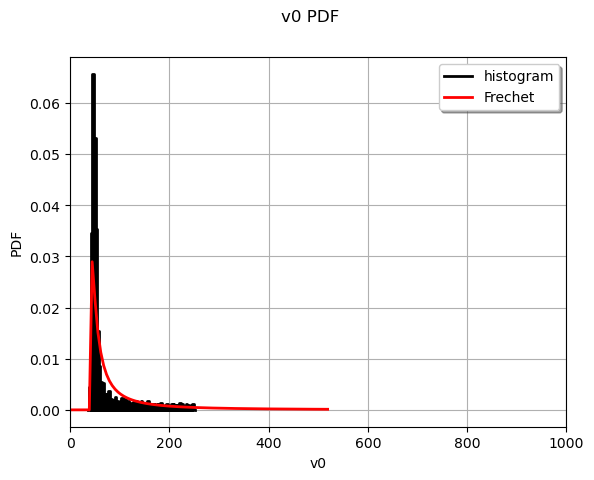

In [93]:
#graph = gev.drawPDF()
#graph.add(ot.HistogramFactory().build(sample).drawPDF())
graph = ot.HistogramFactory().build(sample).drawPDF()
graph.add(gev.drawPDF())
graph.setColors(["black", "red"])
graph.setLegends(["histogram", "Frechet"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
print(axes)
_ = axes[0].set_xlim(0, 1000)
# does not look good, what if you used smoothed data?

In [94]:
myDistribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)
print(myDistribution)
print(myDistribution.getActualDistribution())

GeneralizedExtremeValue(mu=48.9091, sigma=9.01616, xi=0.780182)
Frechet(beta = 11.5565, alpha = 1.28175, gamma = 37.3526)


In [95]:
def pdf(x, a, b, y):
    if x < y: return 0
    z = (x-y)/b
    term1 = (a/b)
    term2 = z**(-1-a)
    term3 = math.exp(-z**-a)
    return term1 * term2 * term3
    
# can change minimum x with y    
print(pdf(37, 1.28, 11.56, 30.35))
#print(pdf(35, 1.28, 11.56, 37.35))
#print(pdf(100, 1.28, 11.56, 37.35))

0.051332438692224515


In [96]:
x_values = []
y_values = []
y_scores = []
for i in range(100):
    x_values.append(i)
    y = pdf(i, 1.28, 11.56, 37.35)
    y_values.append(y)
    if y == 0: y_scores.append(-99)
    else: y_scores.append(math.log2(y))

In [97]:
data = {
    'x': x_values,
    'y': y_values
}

df = pd.DataFrame(data)
df

,x,y
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
...,...,...
95,95,0.002498
96,96,0.002409
97,97,0.002324
98,98,0.002243


(0.0, 200.0)

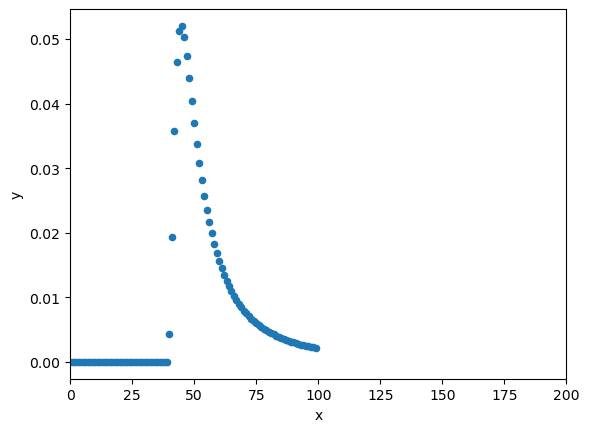

In [98]:
df.plot(x='x', y='y', kind='scatter')
plt.xlim(0,200)